In [1]:
#Label the data
import pandas as pd
import numpy as np

y= pd.read_csv("/content/Labels.csv")
#Volatility
y['log_returns'] = y['Close'].rolling(window=2).apply(lambda x: np.log(x.iloc[1]/x.iloc[0]))
y['variance'] = y['log_returns'].rolling(window=10).var() # ==> Variance calculation 
y['variance'].fillna(0, inplace=True)
# Direction of the market
y['market_direction'] = y['Close'].rolling(window=2).apply(lambda x: 1 if x.iloc[1] >= x.iloc[0] else 0)

 
y['market_direction'].fillna(0, inplace=True)
# Labelling
y_Volatility = y.reset_index()['variance'] *1000
y_Direction = y.reset_index()['market_direction']

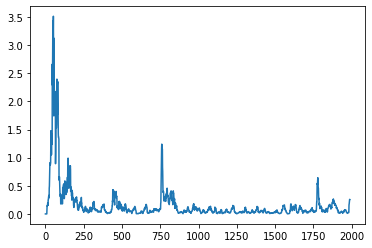

In [2]:
from matplotlib import pyplot as plt 
plt.plot(y_Volatility)

In [3]:
# convert an array of values into a dataset matrix
import numpy as np
def create_dataset(dataset, time_step=3):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [4]:
# choose right objective
y= y_Volatility
y=np.array(y).reshape(-1,1)

# prepar the data
time_step = 100
X, y= create_dataset(y,time_step)



In [5]:
# Splitting the data:
num_validation_samples = 100
x_train = X[:-num_validation_samples]
x_val = X[-num_validation_samples:]
y_train = y[:-num_validation_samples]
y_val = y[-num_validation_samples:]

print(x_train.shape), print(y_train.shape)
print(x_val.shape), print(y_val.shape)

(1788, 100)
(1788,)
(100, 100)
(100,)


(None, None)

train mse 0.0007510722853399785
val mse 0.0002908691312098796
train score 0.9645752519381751
val score 0.9115723152956688


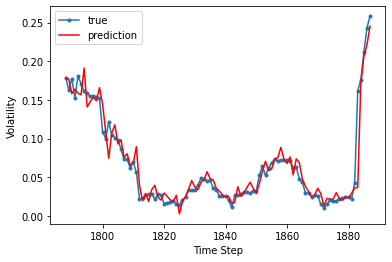

In [6]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# select the model with K-fold validation to see the std error
model = LinearRegression()
model.fit(x_train,y_train)

y_pred= model.predict(x_val)
y_train_pred= model.predict(x_train)

print("train mse", mean_squared_error(y_train, y_train_pred))
print("val mse", mean_squared_error(y_val, y_pred))
print("train score", model.score(x_train, y_train))
print("val score", model.score(x_val, y_val))


plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_val, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_pred, 'r', label="prediction")
plt.ylabel('Volatility')
plt.xlabel('Time Step')
#plt.ylim(0,5)
plt.savefig("LR.png")
plt.legend()
plt.show();


In [46]:
# Linear Regression with K-fold to get std
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# select the model with K-fold validation to see the std error
#model = LinearRegression()
#model = KernelRidge()
model = SVR(kernel='linear', max_iter=100)

trains = []
scores = []
cv = KFold(n_splits=10, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = np.array(X)[train_index], np.array(X)[test_index], np.array(y)[train_index], np.array(y)[test_index]
    model.fit(X_train, y_train)
    scores.append(mean_squared_error(model.predict(X_test), y_test )) # add  squared=True for RMSE
    trains.append(mean_squared_error(model.predict(X_train), y_train))

print(" TRAIN mean score with std error:", np.mean(trains), np.var(trains))
print(" TEST mean score with std error:", np.mean(scores), np.var(scores))



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

 TRAIN mean score with std error: 0.006301896878428465 2.4985315447022912e-05
 TEST mean score with std error: 0.009055950770689523 8.041197652217284e-05


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


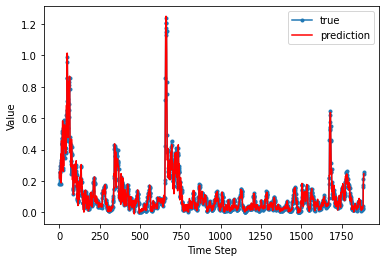

In [47]:
# Compare Prediction results on train + validation data
plt.plot( y , marker='.', label="true")
plt.plot( np.append(y_train_pred,y_pred), 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
#plt.ylim(0,5)
plt.legend()
plt.show();

Epoch 1/50
143/143 [==============================] - 0s 2ms/step - loss: 0.6834 - mse: 0.0437 - val_loss: 0.6295 - val_mse: 0.0086
Epoch 2/50
143/143 [==============================] - 0s 1ms/step - loss: 0.6228 - mse: 0.0193 - val_loss: 0.5933 - val_mse: 0.0072
Epoch 3/50
143/143 [==============================] - 0s 1ms/step - loss: 0.5867 - mse: 0.0170 - val_loss: 0.5599 - val_mse: 0.0066
Epoch 4/50
143/143 [==============================] - 0s 1ms/step - loss: 0.5518 - mse: 0.0140 - val_loss: 0.5287 - val_mse: 0.0062
Epoch 5/50
143/143 [==============================] - 0s 1ms/step - loss: 0.5234 - mse: 0.0156 - val_loss: 0.4990 - val_mse: 0.0057
Epoch 6/50
143/143 [==============================] - 0s 1ms/step - loss: 0.4931 - mse: 0.0136 - val_loss: 0.4712 - val_mse: 0.0054
Epoch 7/50
143/143 [==============================] - 0s 1ms/step - loss: 0.4658 - mse: 0.0130 - val_loss: 0.4447 - val_mse: 0.0048
Epoch 8/50
143/143 [==============================] - 0s 1ms/step - loss: 0.

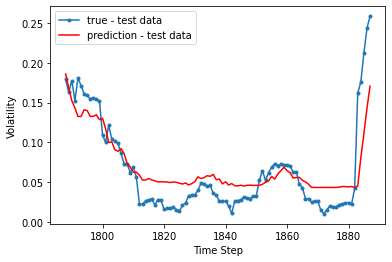

In [7]:
# Simple MLP
from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization, Dropout

input_shape = ( 100,)

# Create the model
model = Sequential()
model.add(Dense(50, kernel_regularizer='l2', input_shape=input_shape, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,  activation='relu'))
model.add(Dropout(0.2))

# mean_square_error and linear activation function for regression problem.
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mse'])
#fit the model and statistics are stored in history for analysis
history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# Results with MLP
y_pred= model.predict(x_val)

plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_val, marker='.', label="true - test data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_pred, 'r', label="prediction - test data")
plt.ylabel('Volatility')
plt.xlabel('Time Step')
#plt.ylim(-.001,0.001)
plt.savefig("Price_MLP_2.png")
plt.legend()
plt.show();

In [11]:
# MLP with K-fold cross validation
from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization, Dropout

def train_predict_MLP_model(x_train, y_train, x_val):


  input_shape = ( 100,)

  # Create the model
  model = Sequential()
  model.add(Dense(50, input_shape=input_shape, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10,  activation='relu'))
  model.add(Dropout(0.2))

  # mean_square_error and linear activation function for regression problem.
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mse'])
  #fit the model and statistics are stored in history for analysis
  history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)
  return (model.predict(x_train), model.predict(x_val))


In [12]:
trains = []
scores = []
cv = KFold(n_splits=10, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = np.array(X)[train_index], np.array(X)[test_index], np.array(y)[train_index], np.array(y)[test_index]
    
    (y_train_pred, y_pred)= train_predict_MLP_model(X_train, y_train, X_test)
    scores.append(mean_squared_error(y_pred, y_test )) # add  squared=True for RMSE
    trains.append(mean_squared_error(y_train_pred, y_train))

print(" TRAIN mean score with std error:", np.mean(trains), np.std(trains))
print(" TEST mean score with std error:", np.mean(scores), np.std(scores))

Epoch 1/50
136/136 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 3/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 4/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 5/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 6/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 7/50
136/136 [==============================] - 0s 1ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 8/50
136/136 [==============================] - 0s 1ms/step - loss: 0.

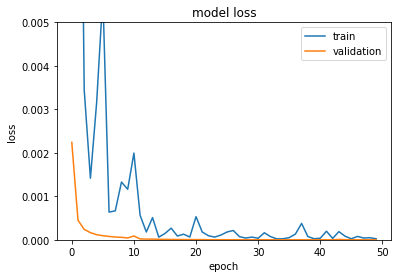

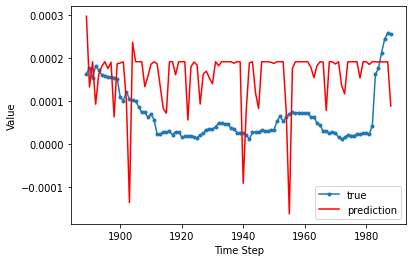

In [ ]:
# Results with MLP
y_pred= model.predict(x_val)

from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.005)
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('Price_MLP_val_2.png')
plt.show()

plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_val, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_val)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
#plt.ylim(-.001,0.001)
plt.savefig("Price_MLP_2.png")
plt.legend()
plt.show();

In [ ]:
# Convert the data shape into 3-Dimensional for LSTM

x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_val =x_val.reshape(x_val.shape[0],x_val.shape[1] , 1)

In [14]:
#LSTM

from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization, Dropout, LSTM

def train_predict_LSTM_model(x_train, y_train, x_val ):
  x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
  x_val =x_val.reshape(x_val.shape[0],x_val.shape[1] , 1)
  input_shape = ( 100,1)

  # Create the model
  model = Sequential()
  model.add(LSTM(30, dropout=0.15, activation ='relu', input_shape=input_shape))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mse'])

  #fit the model and statistics are stored in history for analysis
  history = model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=1, validation_split=0.2)

  #Results with LSTM
  return (model.predict(x_train), model.predict(x_val))

trains = []
scores = []
cv = KFold(n_splits=3, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = np.array(X)[train_index], np.array(X)[test_index], np.array(y)[train_index], np.array(y)[test_index]
    
    (y_train_pred, y_pred)= train_predict_LSTM_model(X_train, y_train, X_test)
    scores.append(mean_squared_error(y_pred, y_test )) # add  squared=True for RMSE
    trains.append(mean_squared_error(y_train_pred, y_train))

print(" TRAIN mean score with std error:", np.mean(trains), np.std(trains))

print(" TEST mean score with std error:", np.mean(scores), np.std(scores))

Epoch 1/20
101/101 [==============================] - 3s 34ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2/20
101/101 [==============================] - 3s 32ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 3/20
101/101 [==============================] - 3s 32ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 4/20
101/101 [==============================] - 3s 32ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 5/20
101/101 [==============================] - 3s 31ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 6/20
101/101 [==============================] - 3s 32ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 7/20
101/101 [==============================] - 3s 31ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 8/20
101/101 [==============================] - 3s 32ms/step - 